<a href="https://colab.research.google.com/github/lakshuguru/DS-MINOR-APRIL/blob/main/DS_MINOR_APRIL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ipython-autotime
%load_ext autotime

time: 286 µs (started: 2021-05-19 05:38:44 +00:00)


In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

mkdir: cannot create directory ‘images’: File exists
time: 139 ms (started: 2021-05-19 07:41:21 +00:00)


In [ ]:
from bing_image_downloader import downloader
downloader.download("people",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.woohome.com/wp-content/uploads/2013/12/DIY-Ways-To-Re-Use-Wine-Barrels-3.jpg
[%] File Downloaded !

[%] Downloading Image #2 from http://myamazingthings.com/wp-content/uploads/2017/03/a6ded5946fe6fcb2718c7b6ff245f863.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://ww1.prweb.com/prfiles/2005/08/05/270032/ISSBD.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.iphone2lovely.com/newyear/wp-content/uploads/2016/10/christmas-hd-wallpapers-1080p.jpg
[%] File Downloaded !

[%] Downloading Image #5 from https://iphoneswallpapers.com/wp-content/uploads/2016/12/road-state-texas-clouds-iPhone-Wallpaper-iphoneswallpapers_com.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.anime-planet.com/images/characters/celty-sturluson-4168.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.clubcrafted.com/wp-content/uploads/2016/11/diy-b

In [ ]:
downloader.download("animals",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 10 Images on Page 1.


[%] Downloading Image #1 from https://www.recreoviral.com/wp-content/uploads/2014/05/leon-marino-y-bebe-730x456.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://babyshowerideas4u.com/wp-content/uploads/2014/04/Jungle-Safari-Baby-Shower-ideas-co-baby-shower-ideas-great-first-birthday-party-ideas.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://www.newopticalillusions.com/wp-content/uploads/2017/07/Perspective-Photography.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.hdwallpapers.in/download/wild_african_lion_4k-540x960.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://tranquilmonkey.com/wp-content/uploads/2014/06/crazy-photos-7.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://www.newslinq.com/wp-content/uploads/2015/03/DogShaming18.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://hative.com/wp-content/uploads/2014/10/nautical-beddi

In [ ]:
downloader.download("vehicles",limit=30,output_dir='images',adult_filter_off=True)



[!!]Indexing page: 1

[%] Indexed 20 Images on Page 1.


[%] Downloading Image #1 from https://www.luxury-sports-cars.com/wp-content/uploads/2016/08/luxury-car-rankings-best-photos-8.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://www.rjthomas-signwriting.co.uk/siteimages/26/4/1/264188/gallery79012/9798330.jpg
[%] File Downloaded !

[%] Downloading Image #3 from https://www.armaholic.com/datas/users/first-chechen-war-mod-version-100-6_4.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://designscad.com/wp-content/uploads/2016/11/detailrolldoor_77127-400x750.gif
[%] File Downloaded !

[%] Downloading Image #5 from https://www.lineargraphicstoowoomba.com.au/wp-content/uploads/2019/05/20170602_112606.jpg
[%] File Downloaded !

[%] Downloading Image #6 from https://www.mtacampervans.com/uploads/9/7/8/9/97897892/img-5098.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://www.rjthomas-signwriting.co.uk/siteimages/26/4/1/264188/gallery79012/979833

In [ ]:
#preprocess

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target = []
images = []
flat_data = []

DATADIR = '/content/images'
CATEGORIES = ['people','animals','vehicles']

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)
  path = os.path.join(DATADIR,category)
  #print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))
    #print(img_array.shape)
    #plt.imshow(img_array)
    img_resized = resize(img_array,(125,125,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

 #flat_data=np.array(flat_data)
 #target=np.array(target)
 #images=np.array(images)    

    

time: 15.1 s (started: 2021-05-19 09:04:18 +00:00)


In [ ]:
len(flat_data[0])

46875

time: 5.78 ms (started: 2021-05-19 09:04:35 +00:00)


In [ ]:
target

<BarContainer object of 3 artists>

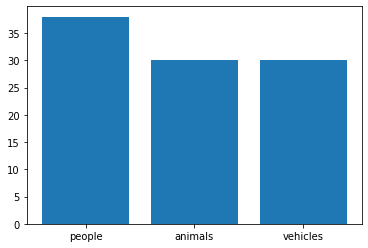

time: 169 ms (started: 2021-05-19 09:04:45 +00:00)


In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(flat_data,target,test_size=0.4,random_state=177)

time: 2.9 ms (started: 2021-05-19 09:23:10 +00:00)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid = [
              {'C':[1,10,100,1000],'kernel':['linear']},
              {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']}
]

svc = svm.SVC(probability=True)
clf = GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

time: 2min 6s (started: 2021-05-19 09:18:49 +00:00)


In [ ]:
y_pred = clf.predict(x_test)
y_pred

array([0, 1, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 2, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 2])

time: 249 ms (started: 2021-05-19 09:23:22 +00:00)


In [ ]:
y_test

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix

time: 1.03 ms (started: 2021-05-19 09:23:28 +00:00)


In [ ]:
accuracy_score(y_pred,y_test)

0.975

time: 7.3 ms (started: 2021-05-19 09:23:31 +00:00)


In [ ]:
confusion_matrix(y_pred,y_test)

array([[13,  0,  0],
       [ 1, 16,  0],
       [ 0,  0, 10]])

time: 7.18 ms (started: 2021-05-19 09:26:07 +00:00)
